### EDA: 2020 Taxi Data

In [8]:
## Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium 

import datetime as dt
# from datetime import datetime



In [4]:
## Reading in cleaned file
taxi_2020 = pd.read_csv('./data/taxi_2020_clean.csv')

In [5]:
taxi_2020.head()

,Unnamed: 0,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,pickup_day_of_week,dropoff_day_of_week,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,trip_time,pickup_borough,dropoff_borough,zone
0,0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,...,Wednesday,Wednesday,0,0,Late night,Late night,0 days 00:04:48,Manhattan,Manhattan,Upper West Side North
1,1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,...,Wednesday,Wednesday,0,0,Late night,Late night,0 days 00:07:25,Manhattan,Manhattan,Upper West Side South
2,2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,...,Wednesday,Wednesday,0,0,Late night,Late night,0 days 00:06:11,Manhattan,Manhattan,Upper West Side North
3,3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,...,Wednesday,Wednesday,0,1,Late night,Late night,0 days 00:04:51,Manhattan,Manhattan,Upper West Side North
4,4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,...,Wednesday,Wednesday,0,0,Late night,Late night,0 days 00:02:18,Queens,Queens,Queensbridge/Ravenswood


In [6]:
taxi_2020 = taxi_2020.drop(columns='Unnamed: 0')

In [5]:
## Nulls make up 3% of rider data in 2020. Better to drop as it is not a significant amount of info.
## Additionally, this could be due to drivers taking rides off the record which happens ever so often.

In [7]:
taxi_2020.isna().sum()

VendorID                  0
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
trip_distance             0
RatecodeID                0
store_and_fwd_flag        0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
congestion_surcharge      0
month                     0
year                      0
pickup_day_of_week        0
dropoff_day_of_week       0
pickup_hour               0
dropoff_hour              0
pickup_timeofday          0
dropoff_timeofday         0
trip_time                 0
pickup_borough            0
dropoff_borough           0
zone                     70
dtype: int64

In [9]:
taxi_2020.dropna(inplace=True)

In [10]:
taxi_2020.tail()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_day_of_week,dropoff_day_of_week,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday,trip_time,pickup_borough,dropoff_borough,zone
23838646,2.0,2020-12-31 23:05:33,2020-12-31 23:31:36,1.0,11.30,1.0,N,107,242,2.0,...,Thursday,Thursday,23,23,Late night,Late night,0 days 00:26:03,Manhattan,Bronx,Gramercy
23838647,2.0,2020-12-31 22:57:20,2020-12-31 23:05:33,1.0,2.18,1.0,N,236,161,1.0,...,Thursday,Thursday,22,23,Late night,Late night,0 days 00:08:13,Manhattan,Manhattan,Upper East Side North
23838648,2.0,2020-12-31 23:40:35,2020-12-31 23:48:43,1.0,2.52,1.0,N,236,24,1.0,...,Thursday,Thursday,23,23,Late night,Late night,0 days 00:08:08,Manhattan,Manhattan,Upper East Side North
23838649,2.0,2020-12-31 23:54:57,2020-12-31 23:57:39,1.0,0.59,1.0,N,238,239,1.0,...,Thursday,Thursday,23,23,Late night,Late night,0 days 00:02:42,Manhattan,Manhattan,Upper West Side North
23838650,2.0,2020-12-31 23:11:16,2020-12-31 23:24:08,1.0,6.06,1.0,N,75,169,2.0,...,Thursday,Thursday,23,23,Late night,Late night,0 days 00:12:52,Manhattan,Bronx,East Harlem South


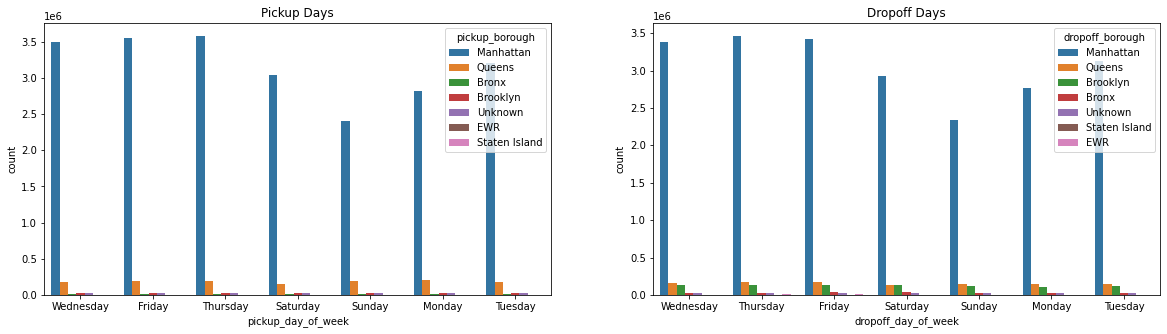

In [11]:
## Passenger Count by Pickup Day
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(data=taxi_2020, x='pickup_day_of_week', hue='pickup_borough', ax=ax1);

## Passenger Count by Dropoff Days
ax2.set_title('Dropoff Days')
ax=sns.countplot(data=taxi_2020, x='dropoff_day_of_week', hue='dropoff_borough', ax=ax2);
# sns.countplot(x="dropoff_day_of_week",data=taxi_2019,ax=ax2)

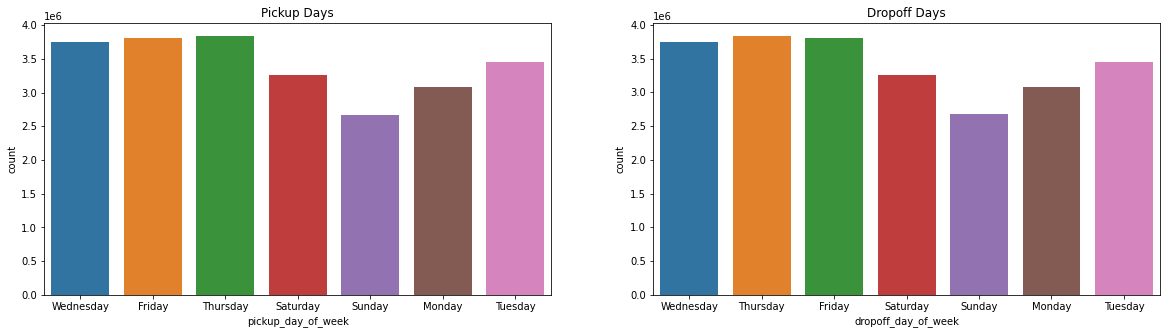

In [13]:
## Passenger Count by Pickup Day
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(data=taxi_2020, x='pickup_day_of_week', ax=ax1);

## Passenger Count by Dropoff Days
ax2.set_title('Dropoff Days')
ax=sns.countplot(data=taxi_2020, x='dropoff_day_of_week', ax=ax2);
# sns.countplot(x="dropoff_day_of_week",data=taxi_2019,ax=ax2)

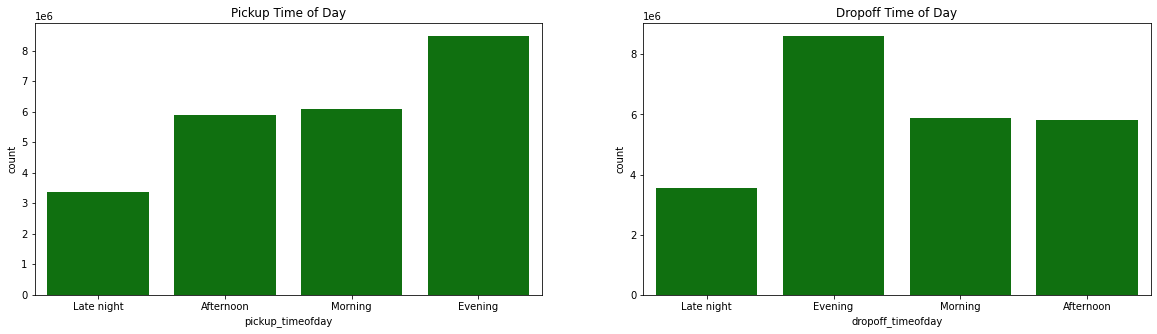

In [14]:
## Picked up trips by time of day
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=taxi_2020,ax=ax1, color='green');

## Dropoff trips by time of day
ax2.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=taxi_2020,ax=ax2, color='green');

In [20]:
## Taxis are hailed predominantly in the evening hours

In [22]:
# Dihistplotnce of trips by Time of day
# sns.lineplot(x='pickup_timeofday',y='trip_distance',data=taxi_2019)

In [17]:
# Don't want to look at any trips over 100 mile radius of NYC
taxi_2020 = taxi_2020.drop((taxi_2020.loc[taxi_2020['trip_distance'] > 100]).index)

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

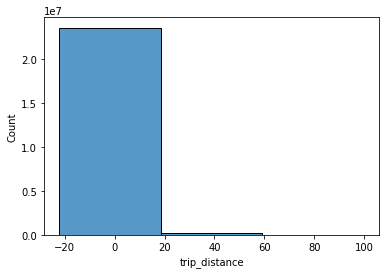

In [18]:
sns.histplot(taxi_2020['trip_distance'], bins= 3)

In [20]:
taxi_2020.loc[taxi_2020['trip_distance'] == 0].shape

(317522, 30)

There are 317k rides where the trip distance is 0. 
The reasons for 0 km distance can be:

- The dropoff location couldn’t be tracked.
- The driver deliberately took this ride to complete a target ride number.
- The passengers canceled the trip.


In [21]:
## Dropping these 
taxi_2020 = taxi_2020[taxi_2020['trip_distance'] != 0]

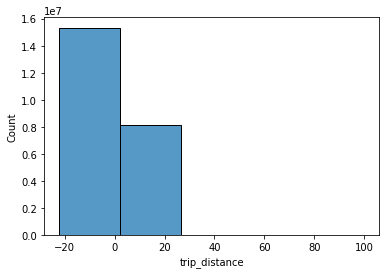

In [22]:
sns.histplot(taxi_2020['trip_distance'], bins= 5);

In [23]:
## majority of rides are under a mile

''

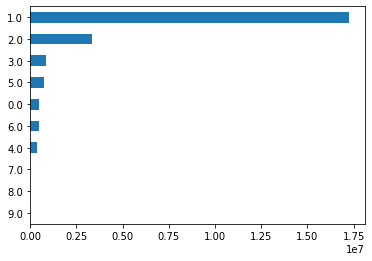

In [24]:
## Passenger count per ride
taxi_2020['passenger_count'].value_counts(ascending=True).plot(kind='barh')
;

In [25]:
##excluding rows over 6 passengers and 0 passengers
taxi_2020 = taxi_2020[taxi_2020['passenger_count'] <= 6]
taxi_2020 = taxi_2020[taxi_2020['passenger_count'] != 0]

In [26]:
taxi_2020['passenger_count'].value_counts(ascending=False)

1.0    17240396
2.0     3325400
3.0      867700
5.0      748695
6.0      472038
4.0      386238
Name: passenger_count, dtype: int64

''

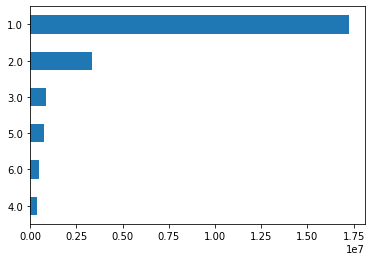

In [27]:
## Passenger count per ride
taxi_2020['passenger_count'].value_counts(ascending=True).plot(kind='barh')
;

In [28]:
#saving file again after additional cleaning
taxi_2020.to_csv('data/taxi_2020_clean_2.csv')

In [29]:
sns.countplot(x='passenger_count',data=taxi_2019)

NameError: name 'taxi_2019' is not defined

In [51]:
## Majority of rides are hailed by paties of 1

In [54]:
taxi_2020.dtypes

VendorID                 float64
pickup_datetime           object
dropoff_datetime          object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
month                     object
year                       int64
pickup_day_of_week        object
dropoff_day_of_week       object
pickup_hour                int64
dropoff_hour               int64
pickup_timeofday          object
dropoff_timeofday         object
trip_time                 object
pickup_borough            object
dropoff_borough           object
zone                      object
dtype: obj

In [ ]:
## Looking at distances 
plt.figure(figsize=(12,8))
(taxi_2020['trip_distance'].value_counts(ascending=False)).plot(kind= 'hist', bins=50)

In [2]:
## sns.lineplot(y='trip_time',x='pickup_timeofday',data=taxi_2019)
## Reloading cleaned_2 file

# taxi_2019 = pd.read_csv('./data/taxi_2019_clean_2.csv')


In [3]:
# taxi_2019['pickup_datetime'] = pd.to_datetime(taxi_2019['pickup_datetime'])

In [4]:
# taxi_2019 = taxi_2019.set_index(pd.DatetimeIndex(taxi_2019['pickup_datetime']))